In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import missingno as msno

In [2]:
df = pd.read_csv("file.csv")

In [3]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct;
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0;
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0;
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0;
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0;
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0;


In [4]:
df.tail()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct;
52950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gift Cards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GC20,20.0;
52951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NJ20,20.0;
52952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AND10,10.0;
52953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AND20,20.0;
52954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,AND30,30.0;


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52955 entries, 0 to 52954
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Transaction_ID       52924 non-null  float64
 5   Transaction_Date     52924 non-null  object 
 6   Product_SKU          52924 non-null  object 
 7   Product_Description  52924 non-null  object 
 8   Product_Category     52955 non-null  object 
 9   Quantity             52924 non-null  float64
 10  Avg_Price            52924 non-null  float64
 11  Delivery_Charges     52924 non-null  float64
 12  Coupon_Status        52924 non-null  object 
 13  GST                  52924 non-null  float64
 14  Date                 52924 non-null  object 
 15  Offline_Spend        52924 non-null  floa

In [6]:
df.shape

(52955, 20)

In [7]:
df.isnull().sum()

CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct;            0
dtype: int64

In [8]:
df.describe()

,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000
mean,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800
std,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664
min,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000
25%,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000
50%,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000
75%,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000
max,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000


In [9]:
columns_to_drop = ["CustomerID", "Date", "Transaction_ID", "Transaction_Date", "Product_SKU", "Product_Description", "Coupon_Status", "GST", "Offline_Spend", "Coupon_Code"]
df.drop(columns=columns_to_drop, inplace=True)
df.isnull().sum()

Gender              31
Location            31
Tenure_Months       31
Product_Category     0
Quantity            31
Avg_Price           31
Delivery_Charges    31
Online_Spend        31
Month                0
Discount_pct;        0
dtype: int64

In [10]:
columns_to_drop = ["Discount_pct;"]
df.drop(columns=columns_to_drop, inplace=True)
df.isnull().sum()

Gender              31
Location            31
Tenure_Months       31
Product_Category     0
Quantity            31
Avg_Price           31
Delivery_Charges    31
Online_Spend        31
Month                0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Gender              0
Location            0
Tenure_Months       0
Product_Category    0
Quantity            0
Avg_Price           0
Delivery_Charges    0
Online_Spend        0
Month               0
dtype: int64

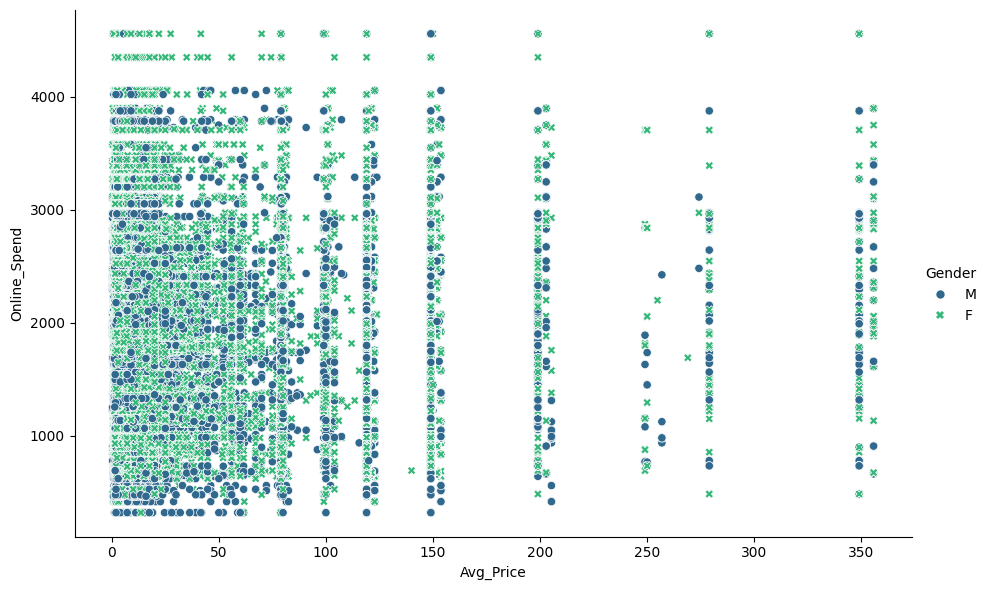

In [13]:
g = sns.relplot(x='Avg_Price', y='Online_Spend', data=df, hue='Gender', style='Gender', palette='viridis', height=6, aspect=1.5)
g.fig.set_size_inches(10, 6)

In [14]:
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})
df['Location'] = df['Location'].map({'Chicago': 0, 'California': 1, 'New York': 2, 'New Jersey': 3, 'Washington DC': 4})
df['Product_Category'] = df['Product_Category'].map({
    'Nest-USA': 0, 'Office': 1, 'Apparel': 2, 'Bags': 3, 'Drinkware': 4, 'Lifestyle': 5,
    'Waze': 6, 'Headgear': 7, 'Fun': 8, 'Notebooks & Journals': 9, 'Google': 10,
    'Nest-Canada': 11, 'Bottles': 12, 'Gift Cards': 13, 'More Bags': 14, 'Backpacks': 15,
    'Housewares': 16, 'Android': 17, 'Nest': 18, 'Accessories': 19
})
df.head()

,Gender,Location,Tenure_Months,Product_Category,Quantity,Avg_Price,Delivery_Charges,Online_Spend,Month
0,0,0,12.0,0,1.0,153.71,6.5,2424.5,1
1,0,0,12.0,0,1.0,153.71,6.5,2424.5,1
2,0,0,12.0,0,2.0,122.77,6.5,2424.5,1
3,0,0,12.0,0,1.0,81.50,6.5,2424.5,1
4,0,0,12.0,0,1.0,153.71,6.5,2424.5,1


In [15]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
numeric_columns.corr()

,Gender,Location,Tenure_Months,Product_Category,Quantity,Avg_Price,Delivery_Charges,Online_Spend,Month
Gender,1.000000,-0.015928,-0.041880,-0.007678,0.006824,-0.012552,0.005397,0.010684,0.009262
Location,-0.015928,1.000000,-0.015317,-0.011190,-0.000125,0.008294,-0.007080,0.010854,-0.013227
Tenure_Months,-0.041880,-0.015317,1.000000,0.003739,0.006867,-0.000785,-0.014848,0.025865,0.019378
Product_Category,-0.007678,-0.011190,0.003739,1.000000,0.008267,0.142061,0.020234,0.047248,0.192012
Quantity,0.006824,-0.000125,0.006867,0.008267,1.000000,-0.113996,0.191383,0.010741,-0.027278
Avg_Price,-0.012552,0.008294,-0.000785,0.142061,-0.113996,1.000000,-0.107799,0.061082,0.120215
Delivery_Charges,0.005397,-0.007080,-0.014848,0.020234,0.191383,-0.107799,1.000000,-0.019512,-0.086253
Online_Spend,0.010684,0.010854,0.025865,0.047248,0.010741,0.061082,-0.019512,1.000000,0.165525
Month,0.009262,-0.013227,0.019378,0.192012,-0.027278,0.120215,-0.086253,0.165525,1.000000


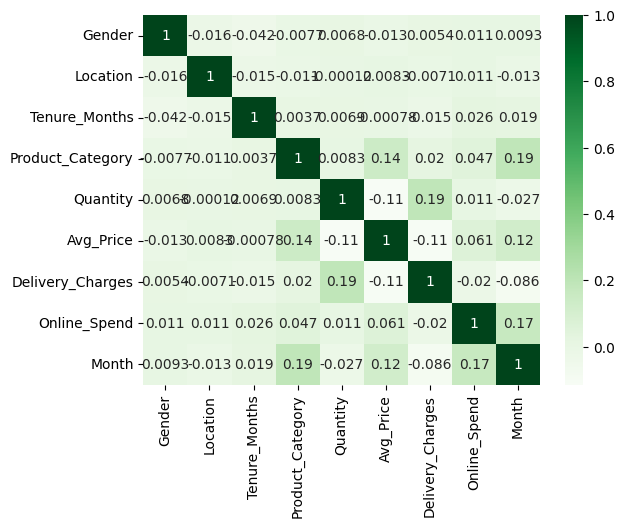

In [16]:
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.show()

In [17]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Online_Spend'].abs().sort_values(ascending=False)
important_features = target_correlation[1:6].index
important_features

Index(['Month', 'Avg_Price', 'Product_Category', 'Tenure_Months',
       'Delivery_Charges'],
      dtype='object')

In [18]:
x=df.drop('Online_Spend', axis=1)
y=df['Online_Spend']

In [19]:
x


,Gender,Location,Tenure_Months,Product_Category,Quantity,Avg_Price,Delivery_Charges,Month
0,0,0,12.0,0,1.0,153.71,6.5,1
1,0,0,12.0,0,1.0,153.71,6.5,1
2,0,0,12.0,0,2.0,122.77,6.5,1
3,0,0,12.0,0,1.0,81.50,6.5,1
4,0,0,12.0,0,1.0,153.71,6.5,1
...,...,...,...,...,...,...,...,...
52919,1,1,8.0,13,1.0,250.00,0.0,3
52920,0,0,34.0,13,1.0,25.00,0.0,3
52921,0,1,15.0,9,1.0,10.80,6.0,10
52922,0,1,15.0,9,1.0,9.60,6.0,10


In [20]:
y

0        2424.50
1        2424.50
2        2424.50
3        2424.50
4        2424.50
          ...   
52919    1294.22
52920    1066.12
52921    2230.76
52922    2230.76
52923    2230.76
Name: Online_Spend, Length: 52924, dtype: float64

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y= le.fit_transform(y)
y

array([269, 269, 269, ..., 244, 244, 244], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of X_test is: {X_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {X_test.shape}")

The shape of X_train is: (42339, 8)
The shape of X_test is: (10585, 8)
The shape of y_train is: (42339,)
The shape of y_test is: (10585, 8)


In [23]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [24]:
pred_train = model.predict(X_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, pred_train)

print(f"confussion matrix naive bayes: {cm}")

from sklearn.metrics import accuracy_score
print(f"akurasi pada saat training: {accuracy_score(y_train, pred_train)}")

confussion matrix naive bayes: [[6 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 8 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
akurasi pada saat training: 0.10980419943787052


In [25]:
pred_test = model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, average="micro")
recall = recall_score(y_test, pred_test, average="micro")
f1 = f1_score(y_test, pred_test, average="micro")

print(f"Confusion Matrix: {cm}")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix: [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.10033065658951346
Precision: 0.10033065658951346
Recall: 0.10033065658951346
F1 Score: 0.10033065658951346
